# <center> Intro to Deep Learning and Computer Vision

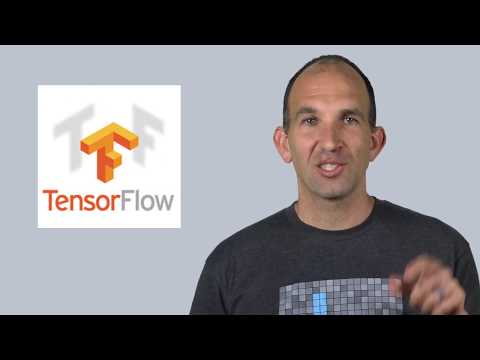

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('wG6rdUURU-w', width=800, height=450)

# <center> Building Models from Convolutions

Source: https://www.kaggle.com/dansbecker/building-models-from-convolutions

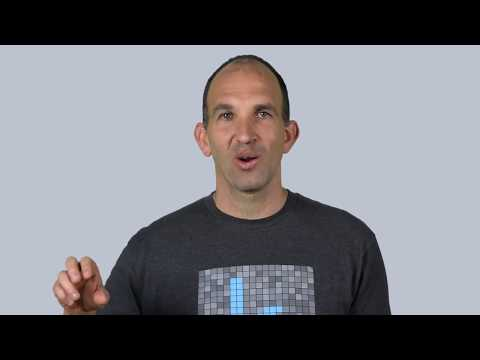

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Bqch2ptaAJ8', width=800, height=450)

# <center> Programming in TensorFlow and Keras

Source: https://www.kaggle.com/dansbecker/programming-in-tensorflow-and-keras

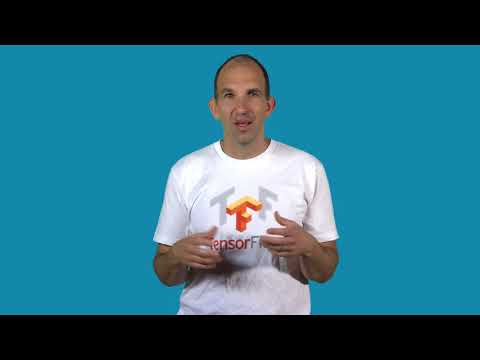

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('sDG5tPtsbSA', width=800, height=450)

### Sample Code

In [4]:
# Choose images to work with
from os.path import join

image_dir = 'Images/train/'
img_paths = [join(image_dir, filename) for filename in ['0246f44bb123ce3f91c939861eb97fb7.jpg',
                            '84728e78632c0910a69d33f82e62638c.jpg',
                            '8825e914555803f4c67b26593c9d5aff.jpg',
                            '91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']]

In [5]:
### Function to Read and Prep Images for Modeling
import numpy as np
import tensorflow
import keras

size = 24

import numpy as np
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
  imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
  img_array = np.array([img_to_array(img) for img in imgs])
  output = preprocess_input(img_array)
  return output

Using TensorFlow backend.


##### Create Model with Pre-Trained Weights. Make Predictions

In [6]:
from keras.applications import ResNet50

my_model = ResNet50(weights='imagenet')
# Replace resnet50_weights_tf_dim_ordering_tf_kernels.h5 with 'imagenet'
test_data = read_and_prep_images(img_paths)
preds =  my_model.predict(test_data)

##### Visualize Predicitons

In [7]:
import sys

sys.path.append('/kaggle/input/python-utility-code-for-deep-learning-exercise/utils')
from keras.applications.resnet50 import decode_predictions

from IPython.display import Image,display

most_likely_labels = decode_predictions(preds, top=3)

for i, img_path in enumerate(img_paths):
  display(Image(img_paths))
  print(most_likely_labels[i])       

/Users/Kavi/anaconda/lib/python3.6/site-packages/IPython/core/formatters.py:337: FormatterWarning: image/png formatter returned invalid type <class 'list'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

[('n02097209', 'standard_schnauzer', 0.57363278), ('n02097047', 'miniature_schnauzer', 0.42467678), ('n02097130', 'giant_schnauzer', 0.00094619842)]


<IPython.core.display.Image object>

[('n02092339', 'Weimaraner', 0.99369735), ('n02109047', 'Great_Dane', 0.0013664225), ('n02100236', 'German_short-haired_pointer', 0.001143955)]


<IPython.core.display.Image object>

[('n02105855', 'Shetland_sheepdog', 0.9486419), ('n02106030', 'collie', 0.044787489), ('n02106166', 'Border_collie', 0.0015023499)]


<IPython.core.display.Image object>

[('n02110627', 'affenpinscher', 0.60964632), ('n02112706', 'Brabancon_griffon', 0.19211127), ('n02094433', 'Yorkshire_terrier', 0.046045057)]


# <center> Transfer Learning
Source: https://www.kaggle.com/dansbecker/transfer-learning

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://youtu.be/qeLL23wD2Zo', height=450)


#### Sample Code
##### Specify Model

In [9]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', 
                          weights='imagenet'))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) moedl. It is already trained
my_new_model.layers[0].trainable = False

##### Compile Model

In [10]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy',
            metrics=['accuracy'])

##### Fit Model

In [11]:
from keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory('Data/rural_and_urban_photos/train',
                                                    target_size=(image_size, image_size),
                                                     batch_size=24,
                                                     class_mode='categorical')

validation_generator = data_generator.flow_from_directory('Data/rural_and_urban_photos/val',
                                                         target_size=(image_size, image_size),
                                                         class_mode='categorical')
my_new_model.fit_generator(train_generator, steps_per_epoch=3,
                          validation_data=validation_generator,
                          validation_steps=1)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/1
3/3 [==============================] - 81s 27s/step - loss: 0.5475 - acc: 0.6389 - val_loss: 0.2000 - val_acc: 0.9500


# <center> Data Augmentation
Source: https://www.kaggle.com/dansbecker/data-augmentation


In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://youtu.be/KysXEztDgeQ', height=450)

### Sample Code
#####  Fitting a Model With Data Augmentation

In [13]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                            horizontal_flip=True, width_shift_range = 0.2,
                                            height_shift_range = 0.2)

train_generator = data_generator_with_aug.flow_from_directory('Data/rural_and_urban_photos/train',
                                                             target_size=(image_size, image_size),
                                                             batch_size=24,
                                                             class_mode='categorical')

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = data_generator_no_aug.flow_from_directory('Data/rural_and_urban_photos/val',
                                                                target_size=(image_size, image_size),
                                                                class_mode='categorical')

my_new_model.fit_generator(train_generator,
                          steps_per_epoch=3,
                          epochs=2,
                          validation_data=validation_generator,
                          validation_steps=1)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/2
3/3 [==============================] - 67s 22s/step - loss: 0.1768 - acc: 0.9861 - val_loss: 0.1680 - val_acc: 0.9500
Epoch 2/2
3/3 [==============================] - 67s 22s/step - loss: 0.0894 - acc: 1.0000 - val_loss: 0.1433 - val_acc: 0.9500


# <center> A Deep Understanding of Deep Learning
Source: https://www.kaggle.com/dansbecker/a-deeper-understanding-of-deep-learning

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://youtu.be/JZBXuINX6E4', height=450)

# <center> A Deep Learning From Scratch
Source: https://www.kaggle.com/dansbecker/deep-learning-from-scratch

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://youtu.be/zN8z-Y7Tr-8', height=450)

### Smaple Code

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout

a = pd.read_csv('Data/Digit Recognizer/train.csv')
a.drop('label', axis=1)
a.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
img_rows, img_cols = 28, 28
num_classes =  10

def data_prep(raw):
  out_y = keras.utils.to_categorical(raw.label, num_classes)
  
  num_images = raw.shape[0]
  x_as_array = raw.values[:,1:]
  x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
  out_x = x_shaped_array / 255
  return out_x, out_y

train_size = 30000
train_file = 'Data/Digit Recognizer/train.csv'

raw_data = pd.read_csv(train_file)
x, y = data_prep(raw_data)
  
model = Sequential()
model.add(Conv2D(20, kernel_size=(3,3),
                activation='relu',
                input_shape=(img_rows, img_cols, 1)))

model.add(Conv2D(20, kernel_size=(3,3),
                activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer='adam',
             metrics=['accuracy'])

model.fit(x, y,
         batch_size=128,
         epochs=2,
         validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/2
33600/33600 [==============================] - 32s 947us/step - loss: 0.2396 - acc: 0.9301 - val_loss: 0.0751 - val_acc: 0.9760

# <center> Dropout and Strides for Larger Models
Source: https://www.kaggle.com/dansbecker/dropout-and-strides-for-larger-models

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=pPiErCD_EGk#action=share', height=450)

### Sample Code

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout

a = pd.read_csv('Data/Digit Recognizer/train.csv')
a.drop('label', axis=1)

img_rows, img_cols = 28, 28
num_classes =  10

def data_prep(raw):
  out_y = keras.utils.to_categorical(raw.label, num_classes)
  
  num_images = raw.shape[0]
  x_as_array = raw.values[:,1:]
  x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
  out_x = x_shaped_array / 255
  return out_x, out_y

train_size = 30000
train_file = 'Data/Digit Recognizer/train.csv'

raw_data = pd.read_csv(train_file)
x, y = data_prep(raw_data)
  
model = Sequential()
model.add(Conv2D(30, kernel_size=(3,3),
                activation='relu',
                input_shape=(img_rows, img_cols, 1)))
Dropout(0.5)
model.add(Conv2D(30, kernel_size=(3,3), strides=2,
                activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer='adam',
             metrics=['accuracy'])

model.fit(x, y,
         batch_size=128,
         epochs=2,
         validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/2
33600/33600 [==============================] - 22s 640us/step - loss: 0.3051 - acc: 0.9098 - val_loss: 0.1034 - val_acc: 0.9689